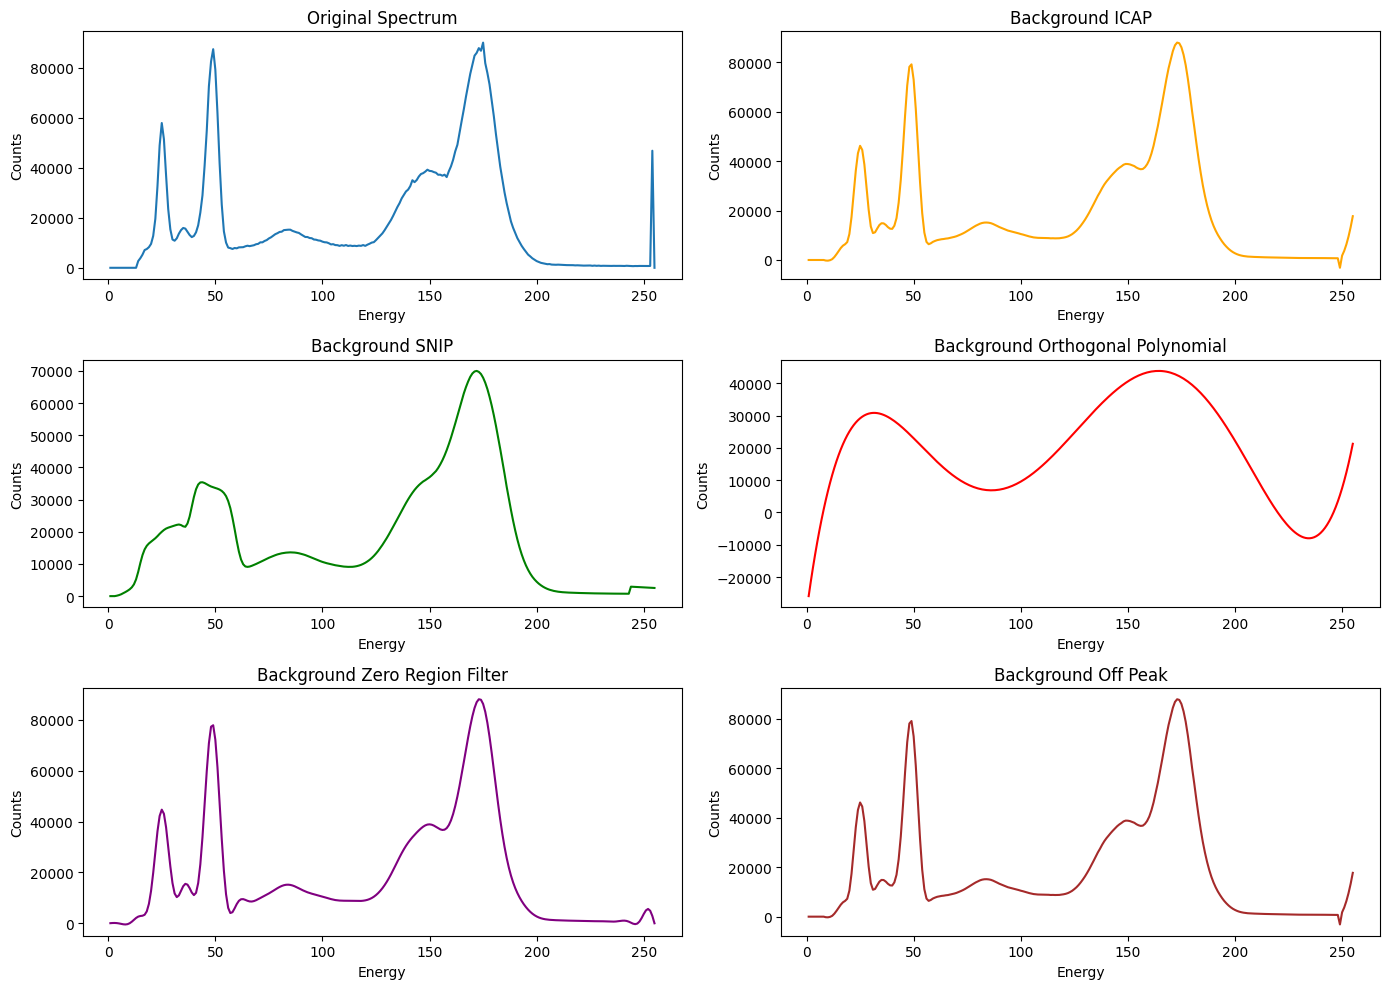

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, butter, filtfilt

# Load the data
filename = '15.5.csv'
data = pd.read_csv(filename)

# Assume the columns are named 'energy' and 'counts'
energy = data.iloc[:, 0].values
spectrum = data.iloc[:, 1].values

# 1. ICAP (Inverse Cumulative Accumulation Process)
def icap_background(spectrum, window_size=11):
    """
    Estimate background using the ICAP method.
    """
    smoothed_spectrum = savgol_filter(spectrum, window_length=window_size, polyorder=2)
    return smoothed_spectrum

background_icap = icap_background(spectrum)

# 2. Manual SNIP Implementation
def manual_snip_background(spectrum, window_size=21):
    """
    Approximate background estimation using a moving average.
    """
    half_window = window_size // 2
    background = np.convolve(spectrum, np.ones(window_size)/window_size, mode='same')
    return background

background_snip = manual_snip_background(spectrum)

# 3. Orthogonal Polynomial Method
from numpy.polynomial import Polynomial

def orthogonal_polynomial_background(energy, spectrum, degree=5):
    """
    Estimate background using orthogonal polynomial fitting.
    """
    p = Polynomial.fit(energy, spectrum, degree)
    return p(energy)

background_poly = orthogonal_polynomial_background(energy, spectrum)

# 4. Zero Region Filter
def zero_region_filter(spectrum, cutoff=0.1, fs=1.0, order=4):
    """
    Estimate background using a zero region digital filter.
    """
    b, a = butter(order, cutoff, fs=fs, btype='low')
    return filtfilt(b, a, spectrum)

background_zero_filter = zero_region_filter(spectrum)

# 5. Off Peak Method
def off_peak_background(spectrum, window_size=11):
    """
    Estimate background using the off peak method.
    """
    smoothed_spectrum = savgol_filter(spectrum, window_length=window_size, polyorder=2)
    return smoothed_spectrum

background_off_peak = off_peak_background(spectrum)

# Plot the results
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
plt.plot(energy, spectrum, label='Original Spectrum')
plt.title('Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Counts')

plt.subplot(3, 2, 2)
plt.plot(energy, background_icap, label='Background ICAP', color='orange')
plt.title('Background ICAP')
plt.xlabel('Energy')
plt.ylabel('Counts')

plt.subplot(3, 2, 3)
plt.plot(energy, background_snip, label='Background SNIP', color='green')
plt.title('Background SNIP')
plt.xlabel('Energy')
plt.ylabel('Counts')

plt.subplot(3, 2, 4)
plt.plot(energy, background_poly, label='Background Orthogonal Polynomial', color='red')
plt.title('Background Orthogonal Polynomial')
plt.xlabel('Energy')
plt.ylabel('Counts')

plt.subplot(3, 2, 5)
plt.plot(energy, background_zero_filter, label='Background Zero Region Filter', color='purple')
plt.title('Background Zero Region Filter')
plt.xlabel('Energy')
plt.ylabel('Counts')

plt.subplot(3, 2, 6)
plt.plot(energy, background_off_peak, label='Background Off Peak', color='brown')
plt.title('Background Off Peak')
plt.xlabel('Energy')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()
